In [91]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("..")
import os
import math
import numpy as np
import torch as t
import torch.utils.data as tdata
import matplotlib.pyplot as plt
from einops import rearrange

from dots.training import *
from dots.trainhooks import *
from dots.models import MLP
from dots.dots import *
from dots.utils import *
from dots.plotting import *
from dots.experiment import get_train_state

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# simple test with relu

In [11]:
ts = get_train_state("../experiments/mlp-relu-good.yml")

In [12]:
ts

In [13]:
ts.dataloader

In [22]:
x = next(iter(ts.dataloader))[0]

In [42]:
ts.model.matrix_jacobian(x).shape

/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(


torch.Size([64, 31])

In [33]:
ts.model.jacobian_matrix_rank(x)

/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(


tensor(11)

In [48]:
svd = t.linalg.svd(ts.model.matrix_jacobian(x), full_matrices=False)

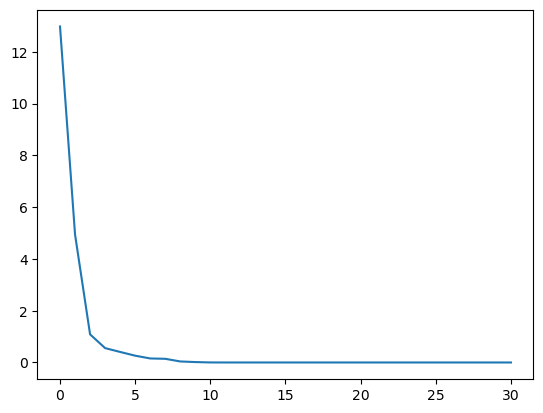

In [54]:
plt.plot(svd.S.detach().cpu().numpy())

/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(


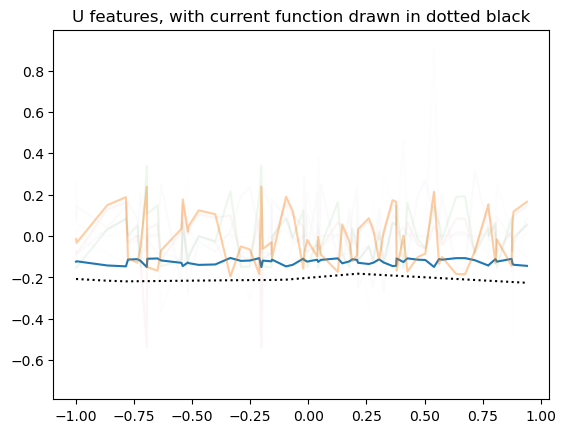

In [68]:
plot_1d_u_feats(x, ts.model)

In [69]:
ts.train(1)

/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(


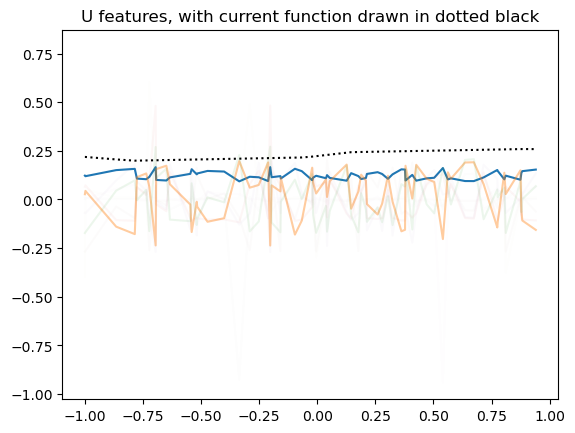

In [70]:

plot_1d_u_feats(x, ts.model)

/home/lrudl/Dropbox/Rudolf/Cambridge/22-23/dots/dots/notebooks/../dots/training.py:259: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


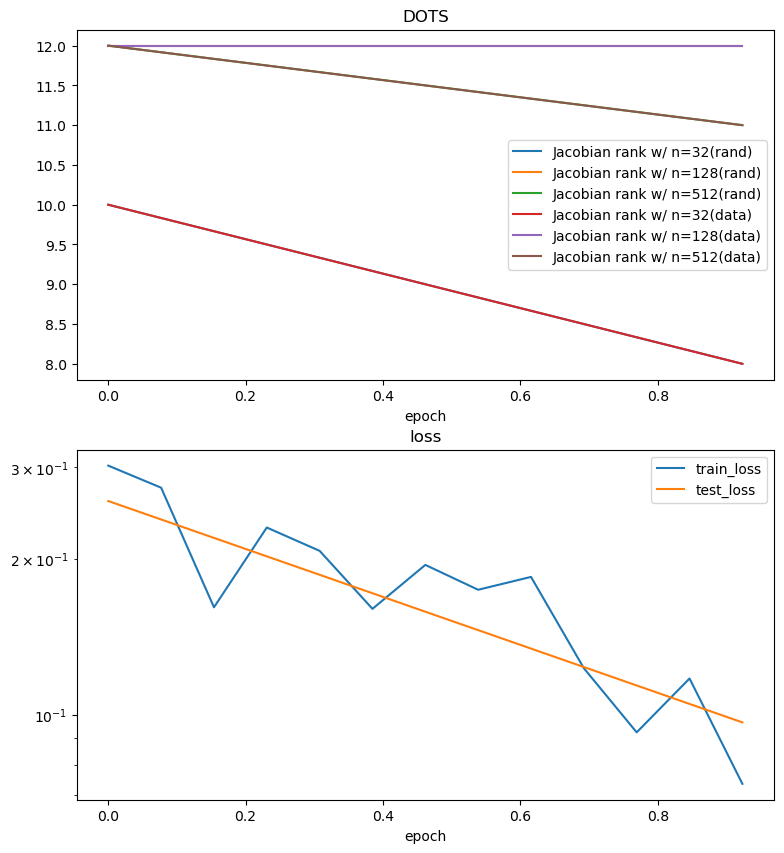

In [71]:
ts.plot()

In [73]:
ts.train(4)

/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(


/home/lrudl/Dropbox/Rudolf/Cambridge/22-23/dots/dots/notebooks/../dots/training.py:259: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


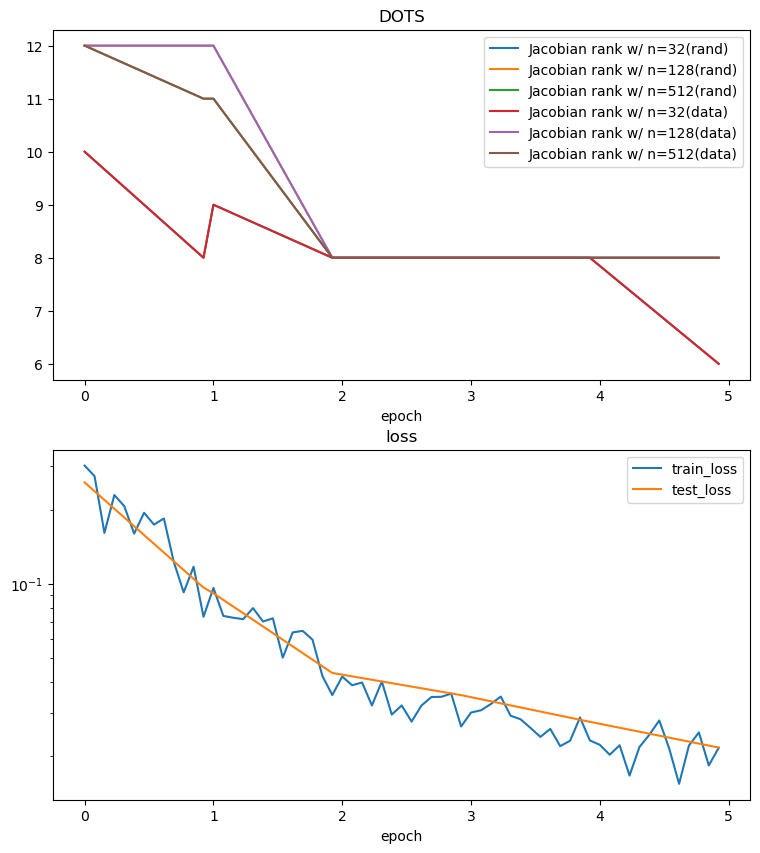

In [74]:
ts.plot()

/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(


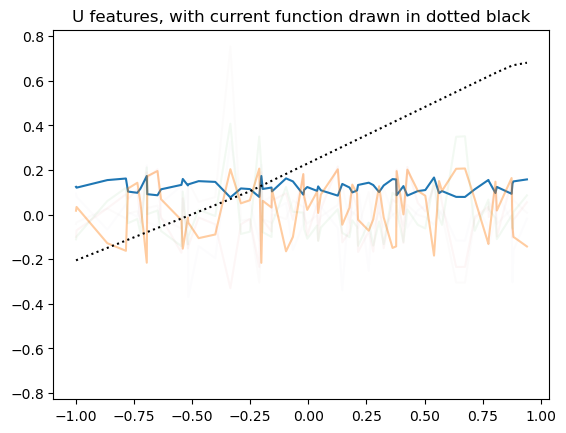

In [75]:

plot_1d_u_feats(x, ts.model)

In [76]:
ts.train(50)

/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(


/home/lrudl/Dropbox/Rudolf/Cambridge/22-23/dots/dots/notebooks/../dots/training.py:259: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


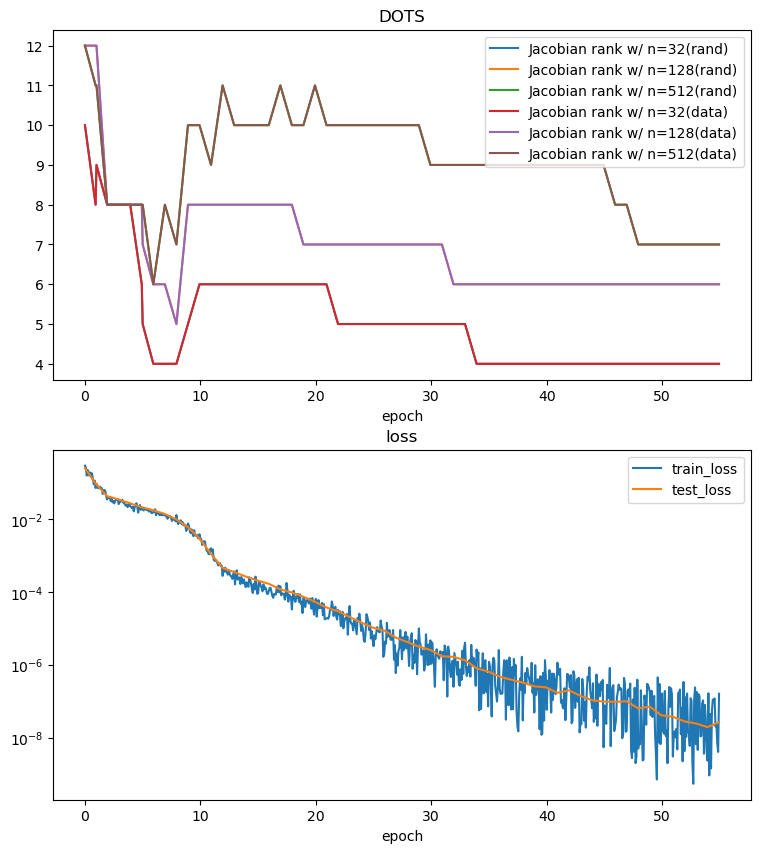

In [77]:
ts.plot()

/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(


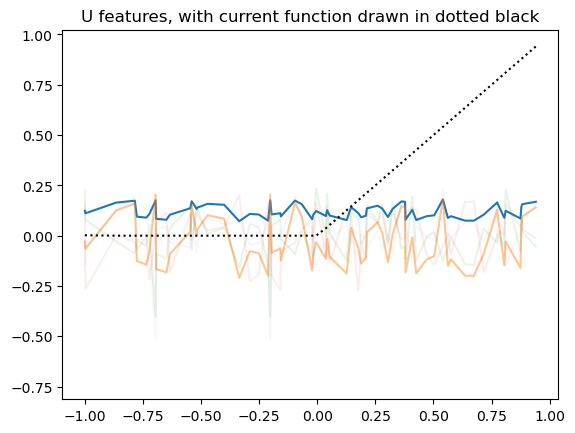

In [82]:
plot_1d_u_feats(x, ts.model)

/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(


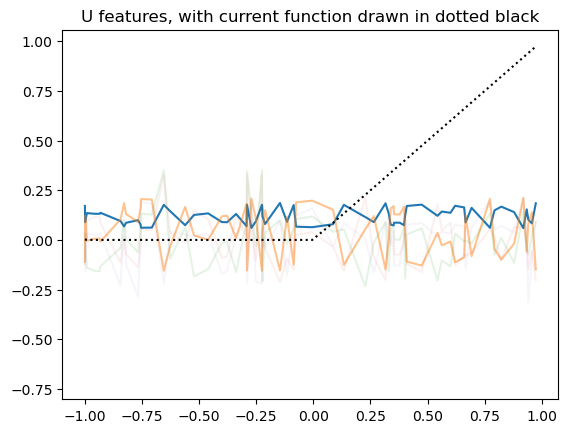

In [84]:
plot_1d_u_feats(next(iter(ts.dataloader))[0], ts.model)

/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(


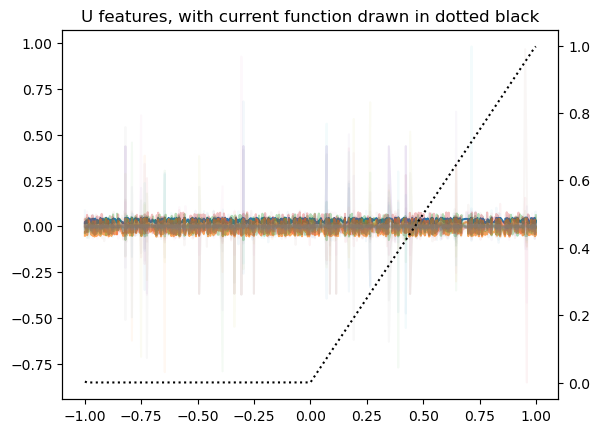

In [89]:
plot_1d_u_feats(range_batch(-1, 1, 1000), ts.model)

/home/lrudl/Dropbox/Rudolf/Cambridge/22-23/dots/dots/notebooks/../dots/utils.py:93: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


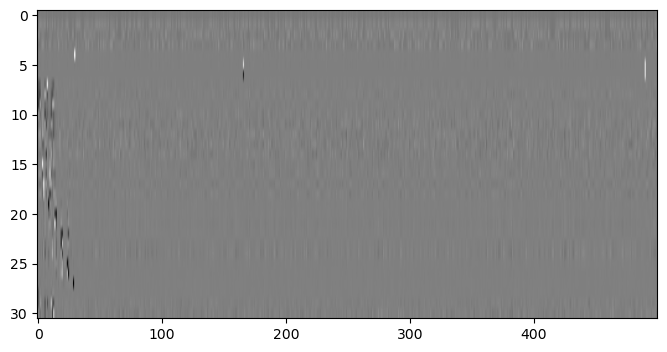

In [110]:
plot_u_feats_img(-1, 1, 500, ts.model)

# more graphs throughout relu training